# Exercise for the 3rd course week

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ,gender, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file (Each student can appear on multiple lines): 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


In [1]:
from enum import Enum

In [2]:
class Gender(Enum):
    Male = "male"
    Female = "Female"

In [3]:
class Course():

    def __init__(self, name, classroom, teacher, ects, grade = None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ects = ects
        self.grade = grade
        
    def __str__(self):
        return "Name: {}, Classroom: {}, Teacher: {}, ECTS: {}, Grade: {}".format(self.name, self.classroom, self.teacher, self.ects, self.grade)
    
    def __repr__(self):
        return self.__str__()

In [4]:
class DataSheet():
    
    def __init__(self, courses = []):
        self.courses = courses
        
    def get_grade_as_list(self, courses = []) -> Course: 
        grade_list = []
        for course in self.courses:
            print(course)
            if course.grade is not None:
                grade_list.append(course.grade)
        return grade_list
    
    def __str__(self):
        return "Courses: {}".format(self.courses)
            

In [5]:
class Student():

    def __init__(self, name, gender, image_url, data_sheet = []):
        self.name = name
        self.gender = gender
        self.image_url = image_url
        self.data_sheet = data_sheet
        
    def get_data_sheet(self, data_sheet = []) -> DataSheet:
        """Get DataSheet""" 
        return self.data_sheet
    
    def get_avg_grade(self):
        finished_courses = 0
        grade_total = 0
        
        for course in self.data_sheet.courses:
            if course.grade is not None:
                finished_courses = finished_courses + 1
                grade_total = grade_total + course.grade
        
        return f'Avg grade: {grade_total / finished_courses}'
            
        
    def __str__(self):
        return "Name: {}, Gender: {}, image_url: {}, data_sheet: {}".format(self.name, self.gender, self.image_url, self.data_sheet)


In [6]:
course_1 = Course("Python", "105", "Thomas", 10)

In [7]:
str(course_1)

'Name: Python, Classroom: 105, Teacher: Thomas, ECTS: 10, Grade: None'

In [8]:
course_2 = Course("Unity", "105", "Jesper", 10)

In [9]:
str(course_2)

'Name: Unity, Classroom: 105, Teacher: Jesper, ECTS: 10, Grade: None'

In [10]:
course_3 = Course("Programmering 3. semester", "105", "Thomas", 20, 12)

In [11]:
str(course_3)

'Name: Programmering 3. semester, Classroom: 105, Teacher: Thomas, ECTS: 20, Grade: 12'

In [12]:
course_4 = Course("Systemudvikling", "105", "Palle", 10, 10)

In [13]:
str(course_4)

'Name: Systemudvikling, Classroom: 105, Teacher: Palle, ECTS: 10, Grade: 10'

In [14]:
student_1 = Student("Arik", Gender.Male.value, "https://google.com", DataSheet([course_1, course_2, course_3, course_4]))

In [15]:
print(student_1.__dict__)

{'name': 'Arik', 'gender': 'male', 'image_url': 'https://google.com', 'data_sheet': <__main__.DataSheet object at 0x7f725876bd90>}


In [16]:
str(student_1)

'Name: Arik, Gender: male, image_url: https://google.com, data_sheet: Courses: [Name: Python, Classroom: 105, Teacher: Thomas, ECTS: 10, Grade: None, Name: Unity, Classroom: 105, Teacher: Jesper, ECTS: 10, Grade: None, Name: Programmering 3. semester, Classroom: 105, Teacher: Thomas, ECTS: 20, Grade: 12, Name: Systemudvikling, Classroom: 105, Teacher: Palle, ECTS: 10, Grade: 10]'

In [17]:
student_1.get_data_sheet().get_grade_as_list()

Name: Python, Classroom: 105, Teacher: Thomas, ECTS: 10, Grade: None
Name: Unity, Classroom: 105, Teacher: Jesper, ECTS: 10, Grade: None
Name: Programmering 3. semester, Classroom: 105, Teacher: Thomas, ECTS: 20, Grade: 12
Name: Systemudvikling, Classroom: 105, Teacher: Palle, ECTS: 10, Grade: 10


[12, 10]

In [18]:
student_1.get_avg_grade()

'Avg grade: 11.0'

In [19]:
import random

In [20]:
male_names = ['Hans', 'Jesper', 'Ole', 'Søren', 'Flemming', 'Jens']
female_names = ['Lise', 'Hanne', 'Line', 'Laura', 'Mia', 'Lotte']
courses_list = [{'Name': 'Python', 'Classroom': '105', 'Teacher': 'Thomas', 'ECTS': 10}, {'Name': 'Unity', 'Classroom': '105', 'Teacher': 'Jesper', 'ECTS': 10}, {'Name': 'Security', 'Classroom': '105', 'Teacher': 'Daniel', 'ECTS': 10}, {'Name': 'Systemudvikling', 'Classroom': '105', 'Teacher': 'Palle', 'ECTS': 10}, {'Name': 'Programmering', 'Classroom': '105', 'Teacher': 'Thomas', 'ECTS': 20}]           

In [21]:
courses_list

[{'Name': 'Python', 'Classroom': '105', 'Teacher': 'Thomas', 'ECTS': 10},
 {'Name': 'Unity', 'Classroom': '105', 'Teacher': 'Jesper', 'ECTS': 10},
 {'Name': 'Security', 'Classroom': '105', 'Teacher': 'Daniel', 'ECTS': 10},
 {'Name': 'Systemudvikling',
  'Classroom': '105',
  'Teacher': 'Palle',
  'ECTS': 10},
 {'Name': 'Programmering',
  'Classroom': '105',
  'Teacher': 'Thomas',
  'ECTS': 20}]

In [22]:
import time

In [23]:
def make_random_students(number_of_students = 2, number_of_courses = 2):
    student_list = []
    
    
    print("Number of student to create: " + str(number_of_students))
    print("Number of courses per student: " + str(number_of_courses))
    
    for number in range(0,number_of_students):
        #print(number)
        data_sheet = DataSheet([])
        print('Length data_sheet courses: ' + str(len(data_sheet.courses)))
    
        for course in range(0,number_of_courses):
                print('Beginning of a loop.....\n')
                
                course_isTaken = False

                random_course_number = random.randint(0,len(courses_list) - 1)
                print('Random course number: ' + str(random_course_number))
                print(courses_list[random_course_number])

                course_to_add = courses_list[random_course_number]
                print("\n")
                print("Checking course: " + course_to_add['Name'])
                print("------\n")

                for current_course in data_sheet.courses:
                    print("Current course: " + current_course.name)
                    print("Course to add and check against: " + course_to_add['Name'])
                    if current_course.name == course_to_add['Name']:
                        print("Course already added: " + current_course.name)
                        course_isTaken = True

                if course_isTaken == False:
                    random_grade = random.choice([-2, 0, 2, 4, 7, 10, 12])
                    make_course_object = Course(course_to_add['Name'], course_to_add['Classroom'], course_to_add['Teacher'], course_to_add['ECTS'], random_grade)
                    print("Adding course: " + make_course_object.name)
                    data_sheet.courses.append(make_course_object)

                print('Sheet length: ' + str(len(data_sheet.courses)))
                print(data_sheet.__dict__)

        print("\n")
        print("Creating Student\n")
        studen_name = ''
        student_gender = ''
        student_image_url = 'https://cphbusiness.dk/images/'

        male_or_female = random.choice([0, 1])
        #print(male_or_female)


        if male_or_female == 0:
            student_name = random.choice(male_names)
            student_gender = Gender.Male.value
        else:
            student_name = random.choice(female_names)
            student_gender = Gender.Female.value

        student_image_url = student_image_url + student_name

        print("Student Info:")
        print(student_name)
        print(student_gender)
        print(student_image_url)

        print("\n")
        print("Adding or creating student list")

        student_to_add = None
        if(len(student_list) == 0):
            print("Creating student...")
            student_to_add = Student(student_name, student_gender, student_image_url, data_sheet)
            print(student_to_add.__dict__)
            print("Adding student to list: " + student_name)
            #time.sleep(3)
            student_list.append(student_to_add)
            
            print("------\n")
            print("Student slut info:")
            print("Student name: " + student_to_add.name)
            for course in student_to_add.data_sheet.courses:
                print(course.name)

        else:

            Student_already_on_the_list = False

            print("Chekking i student is already on the student_list")
            for student_to_check in student_list:
                if(student_to_check.name == student_name):
                    print("Student is already on the list :(")
                    Student_already_on_the_list = True

            if(Student_already_on_the_list == False):
                print("Student is not on the list")
                print("Creating student...")
                student_to_add = Student(student_name, student_gender, student_image_url, data_sheet)
                print(student_to_add.__dict__)
                print("Adding student to list: " + student_name)
                #time.sleep(3)
                student_list.append(student_to_add)
                
                print("------\n")
                print("Student slut info:")
                print("Student name: " + student_to_add.name)
                for course in student_to_add.data_sheet.courses:
                    print(course.name)
                
                
        


    print("\n")
    print("Student list info:") 
    print('Student list length: ' + str(len(student_list)))
    for student in student_list:
        print(student.__dict__)
    
    return student_list
            

In [24]:
random_student_list = make_random_students(8,4)

Number of student to create: 8
Number of courses per student: 4
Length data_sheet courses: 0
Beginning of a loop.....

Random course number: 1
{'Name': 'Unity', 'Classroom': '105', 'Teacher': 'Jesper', 'ECTS': 10}


Checking course: Unity
------

Adding course: Unity
Sheet length: 1
{'courses': [Name: Unity, Classroom: 105, Teacher: Jesper, ECTS: 10, Grade: -2]}
Beginning of a loop.....

Random course number: 0
{'Name': 'Python', 'Classroom': '105', 'Teacher': 'Thomas', 'ECTS': 10}


Checking course: Python
------

Current course: Unity
Course to add and check against: Python
Adding course: Python
Sheet length: 2
{'courses': [Name: Unity, Classroom: 105, Teacher: Jesper, ECTS: 10, Grade: -2, Name: Python, Classroom: 105, Teacher: Thomas, ECTS: 10, Grade: 10]}
Beginning of a loop.....

Random course number: 0
{'Name': 'Python', 'Classroom': '105', 'Teacher': 'Thomas', 'ECTS': 10}


Checking course: Python
------

Current course: Unity
Course to add and check against: Python
Current cour

In [25]:
random_student_list

# CSV Write

In [26]:
import csv

In [27]:
file_to_output = open('student_list.csv', 'w', newline = '')

In [28]:
# You can seperate with ",", ";", "\t" etc.
csv_writer = csv.writer(file_to_output, delimiter = ',')

In [29]:
# If we do it this way, we DEFINE the number of columnes
# stud_name, course_name, teacher, ,gender, ects, classroom, grade, img_url
csv_writer.writerow(['Student Name', 'Course', 'Teacher', 'Gender', 'ECTS', 'Classroom', 'Grade', 'Image Url'])

67

In [30]:
# We HAVE to make 8 items pr. row because we opened the file with ['Student Name', 'Course', 'Teacher', 'Gender', 'ECTS', 'Classroom', 'Grade', 'Image Url']
rows_to_write_to_cvs = []

for student in random_student_list:
    for course in student.data_sheet.courses:
        object_to_write = [student.name, course.name, course.teacher, student.gender, course.ects, course.classroom, course.grade, student.image_url]
        print(object_to_write)
        rows_to_write_to_cvs.append(object_to_write)

csv_writer.writerows(rows_to_write_to_cvs)

['Lotte', 'Unity', 'Jesper', 'Female', 10, '105', -2, 'https://cphbusiness.dk/images/Lotte']
['Lotte', 'Python', 'Thomas', 'Female', 10, '105', 10, 'https://cphbusiness.dk/images/Lotte']
['Lotte', 'Systemudvikling', 'Palle', 'Female', 10, '105', 0, 'https://cphbusiness.dk/images/Lotte']
['Flemming', 'Security', 'Daniel', 'male', 10, '105', 7, 'https://cphbusiness.dk/images/Flemming']
['Flemming', 'Programmering', 'Thomas', 'male', 20, '105', 7, 'https://cphbusiness.dk/images/Flemming']
['Flemming', 'Python', 'Thomas', 'male', 10, '105', 0, 'https://cphbusiness.dk/images/Flemming']
['Flemming', 'Systemudvikling', 'Palle', 'male', 10, '105', 2, 'https://cphbusiness.dk/images/Flemming']
['Jens', 'Systemudvikling', 'Palle', 'male', 10, '105', 2, 'https://cphbusiness.dk/images/Jens']
['Jens', 'Python', 'Thomas', 'male', 10, '105', 2, 'https://cphbusiness.dk/images/Jens']
['Jens', 'Programmering', 'Thomas', 'male', 20, '105', 2, 'https://cphbusiness.dk/images/Jens']
['Mia', 'Python', 'Thomas

In [31]:
file_to_output.close()

# CSV Read

In [32]:
# Open the file
data = open('student_list.csv', encoding = 'utf-8')

# csv.reader
# You can seperate with ",", ";", "\t" etc. Look at the file and find the delimiter
csv_data = csv.reader(data, delimiter = ',')

# Reformat it into python list
student_data = list(csv_data)

In [33]:
student_data

[['Student Name',
  'Course',
  'Teacher',
  'Gender',
  'ECTS',
  'Classroom',
  'Grade',
  'Image Url'],
 ['Lotte',
  'Unity',
  'Jesper',
  'Female',
  '10',
  '105',
  '-2',
  'https://cphbusiness.dk/images/Lotte'],
 ['Lotte',
  'Python',
  'Thomas',
  'Female',
  '10',
  '105',
  '10',
  'https://cphbusiness.dk/images/Lotte'],
 ['Lotte',
  'Systemudvikling',
  'Palle',
  'Female',
  '10',
  '105',
  '0',
  'https://cphbusiness.dk/images/Lotte'],
 ['Flemming',
  'Security',
  'Daniel',
  'male',
  '10',
  '105',
  '7',
  'https://cphbusiness.dk/images/Flemming'],
 ['Flemming',
  'Programmering',
  'Thomas',
  'male',
  '20',
  '105',
  '7',
  'https://cphbusiness.dk/images/Flemming'],
 ['Flemming',
  'Python',
  'Thomas',
  'male',
  '10',
  '105',
  '0',
  'https://cphbusiness.dk/images/Flemming'],
 ['Flemming',
  'Systemudvikling',
  'Palle',
  'male',
  '10',
  '105',
  '2',
  'https://cphbusiness.dk/images/Flemming'],
 ['Jens',
  'Systemudvikling',
  'Palle',
  'male',
  '10',


In [34]:
# loop through the list and print each student with name, img_url and avg_grade.

def make_student_looped_list(student_list):
    check_list = []
    student_dict_objects = []
    student_list_objects = []
    
    for student in student_list[1:]:
        #print(student)
        student_name = student[0]
        
        if student_name not in check_list:
            ects = 0
            grade = 0
            number_of_courses = 0
            
            for student in student_list[1:]:
                
                
                if student[0] == student_name:
                    ects = ects + int(student[4])
                    grade = grade + int(student[6])
                    number_of_courses = number_of_courses + 1
            
            
            avg_grade = grade / number_of_courses
            education_left = (ects/150) * 100
            print("\n")
            print("Student name: " + student_name)
            print("Ects: " + str(ects))
            print("Grade Total: " + str(grade))
            print("Number of courses: " + str(number_of_courses))
            print("Education left: " + str(education_left))
            print("Avr Grade: " + str(avg_grade))
            student_to_object = {"Name": student_name, "ECTSTotal": ects, "GradeTotal": grade, "CourseTotal": number_of_courses, "AvgGrade": avg_grade, 'EducationLeft': education_left}
            student_dict_objects.append(student_to_object)
            print(student_to_object)
            student_to_list = [student_name, ects, grade, number_of_courses, avg_grade, education_left]
            student_list_objects.append(student_to_list)
            print(student_to_list)
            check_list.append(student_name)
    
    return (student_dict_objects, student_list_objects)
        
        

In [35]:
student_data_dict, student_data_list = make_student_looped_list(student_data)



Student name: Lotte
Ects: 30
Grade Total: 8
Number of courses: 3
Education left: 20.0
Avr Grade: 2.6666666666666665
{'Name': 'Lotte', 'ECTSTotal': 30, 'GradeTotal': 8, 'CourseTotal': 3, 'AvgGrade': 2.6666666666666665, 'EducationLeft': 20.0}
['Lotte', 30, 8, 3, 2.6666666666666665, 20.0]


Student name: Flemming
Ects: 50
Grade Total: 16
Number of courses: 4
Education left: 33.33333333333333
Avr Grade: 4.0
{'Name': 'Flemming', 'ECTSTotal': 50, 'GradeTotal': 16, 'CourseTotal': 4, 'AvgGrade': 4.0, 'EducationLeft': 33.33333333333333}
['Flemming', 50, 16, 4, 4.0, 33.33333333333333]


Student name: Jens
Ects: 40
Grade Total: 6
Number of courses: 3
Education left: 26.666666666666668
Avr Grade: 2.0
{'Name': 'Jens', 'ECTSTotal': 40, 'GradeTotal': 6, 'CourseTotal': 3, 'AvgGrade': 2.0, 'EducationLeft': 26.666666666666668}
['Jens', 40, 6, 3, 2.0, 26.666666666666668]


Student name: Mia
Ects: 30
Grade Total: 4
Number of courses: 3
Education left: 20.0
Avr Grade: 1.3333333333333333
{'Name': 'Mia', '

In [36]:
student_data_dict

[{'Name': 'Lotte',
  'ECTSTotal': 30,
  'GradeTotal': 8,
  'CourseTotal': 3,
  'AvgGrade': 2.6666666666666665,
  'EducationLeft': 20.0},
 {'Name': 'Flemming',
  'ECTSTotal': 50,
  'GradeTotal': 16,
  'CourseTotal': 4,
  'AvgGrade': 4.0,
  'EducationLeft': 33.33333333333333},
 {'Name': 'Jens',
  'ECTSTotal': 40,
  'GradeTotal': 6,
  'CourseTotal': 3,
  'AvgGrade': 2.0,
  'EducationLeft': 26.666666666666668},
 {'Name': 'Mia',
  'ECTSTotal': 30,
  'GradeTotal': 4,
  'CourseTotal': 3,
  'AvgGrade': 1.3333333333333333,
  'EducationLeft': 20.0},
 {'Name': 'Line',
  'ECTSTotal': 40,
  'GradeTotal': 8,
  'CourseTotal': 3,
  'AvgGrade': 2.6666666666666665,
  'EducationLeft': 26.666666666666668},
 {'Name': 'Hans',
  'ECTSTotal': 30,
  'GradeTotal': 6,
  'CourseTotal': 2,
  'AvgGrade': 3.0,
  'EducationLeft': 20.0}]

In [37]:
student_data_list

[['Lotte', 30, 8, 3, 2.6666666666666665, 20.0],
 ['Flemming', 50, 16, 4, 4.0, 33.33333333333333],
 ['Jens', 40, 6, 3, 2.0, 26.666666666666668],
 ['Mia', 30, 4, 3, 1.3333333333333333, 20.0],
 ['Line', 40, 8, 3, 2.6666666666666665, 26.666666666666668],
 ['Hans', 30, 6, 2, 3.0, 20.0]]

In [38]:
student_data_dict_sorted = sorted(student_data_dict, key=lambda k: k['AvgGrade'])

In [39]:
student_data_dict_sorted

[{'Name': 'Mia',
  'ECTSTotal': 30,
  'GradeTotal': 4,
  'CourseTotal': 3,
  'AvgGrade': 1.3333333333333333,
  'EducationLeft': 20.0},
 {'Name': 'Jens',
  'ECTSTotal': 40,
  'GradeTotal': 6,
  'CourseTotal': 3,
  'AvgGrade': 2.0,
  'EducationLeft': 26.666666666666668},
 {'Name': 'Lotte',
  'ECTSTotal': 30,
  'GradeTotal': 8,
  'CourseTotal': 3,
  'AvgGrade': 2.6666666666666665,
  'EducationLeft': 20.0},
 {'Name': 'Line',
  'ECTSTotal': 40,
  'GradeTotal': 8,
  'CourseTotal': 3,
  'AvgGrade': 2.6666666666666665,
  'EducationLeft': 26.666666666666668},
 {'Name': 'Hans',
  'ECTSTotal': 30,
  'GradeTotal': 6,
  'CourseTotal': 2,
  'AvgGrade': 3.0,
  'EducationLeft': 20.0},
 {'Name': 'Flemming',
  'ECTSTotal': 50,
  'GradeTotal': 16,
  'CourseTotal': 4,
  'AvgGrade': 4.0,
  'EducationLeft': 33.33333333333333}]

In [40]:
from operator import itemgetter

In [41]:
student_data_list_sorted = sorted(student_data_list, key=itemgetter(4), reverse=True)

In [42]:
student_data_list_sorted

[['Flemming', 50, 16, 4, 4.0, 33.33333333333333],
 ['Hans', 30, 6, 2, 3.0, 20.0],
 ['Lotte', 30, 8, 3, 2.6666666666666665, 20.0],
 ['Line', 40, 8, 3, 2.6666666666666665, 26.666666666666668],
 ['Jens', 40, 6, 3, 2.0, 26.666666666666668],
 ['Mia', 30, 4, 3, 1.3333333333333333, 20.0]]

<IPython.core.display.Javascript object>


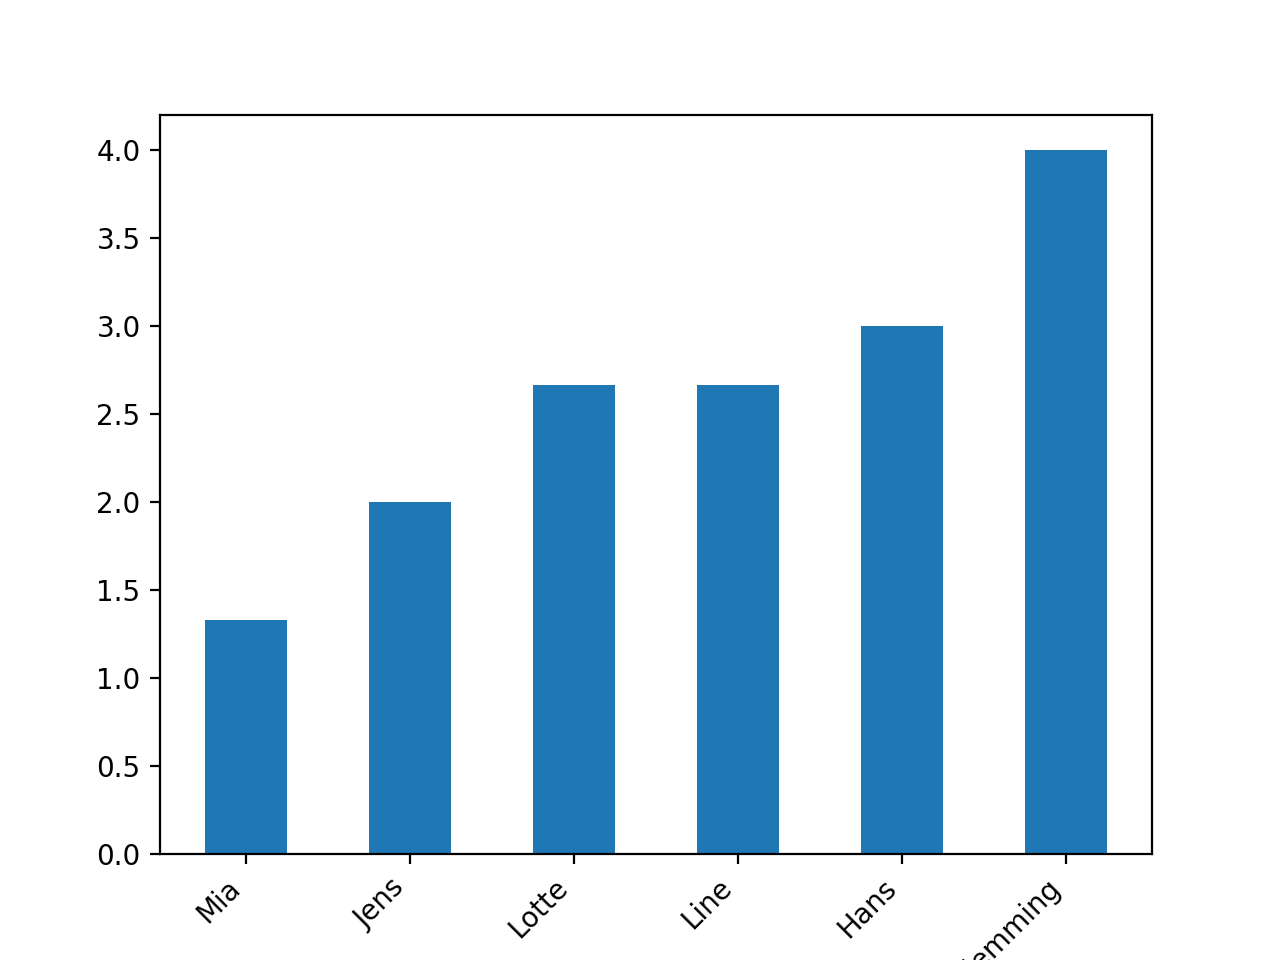

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

In [43]:
# create a bar chart with student_name on x and avg_grade on y-axis
%matplotlib notebook
import matplotlib.pyplot as plt

# Student names and avg grade
name_list = []
avg_grade_list = []
for student in student_data_dict_sorted:
    #print(student['Name'])
    name_list.append(student['Name'])
    avg_grade_list.append(student['AvgGrade'])

plt.bar(name_list,avg_grade_list,width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

<IPython.core.display.Javascript object>


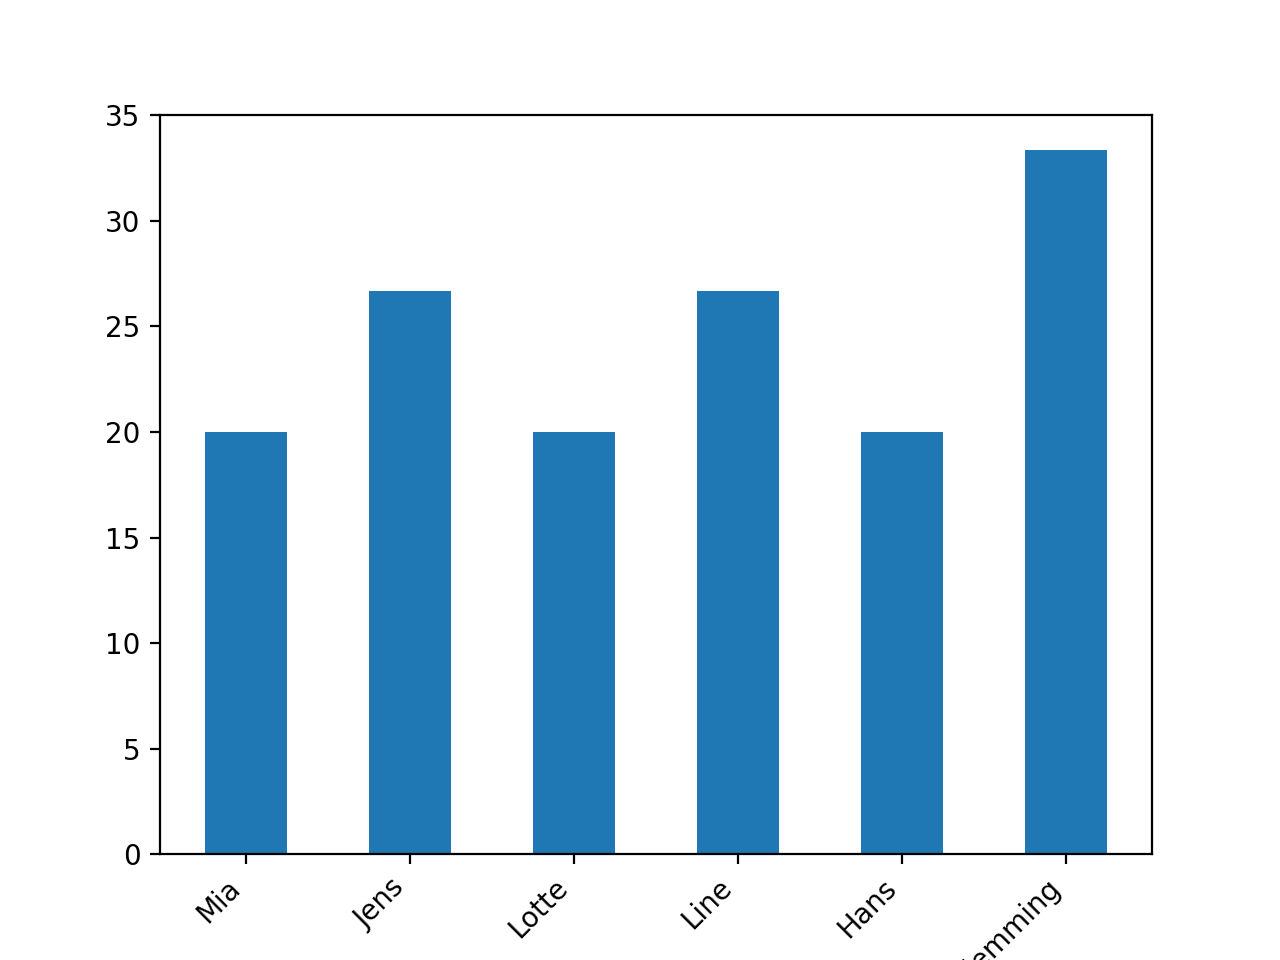

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

In [44]:
# Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

plt.figure()

# Student names and study progression
name_list = []
progression_list = []
for student in student_data_dict_sorted:
    #print(student['Name'])
    name_list.append(student['Name'])
    progression_list.append(student['EducationLeft'])

plt.bar(name_list,progression_list,width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [45]:
random_student_list1 = make_random_students(2,2)

Number of student to create: 2
Number of courses per student: 2
Length data_sheet courses: 0
Beginning of a loop.....

Random course number: 2
{'Name': 'Security', 'Classroom': '105', 'Teacher': 'Daniel', 'ECTS': 10}


Checking course: Security
------

Adding course: Security
Sheet length: 1
{'courses': [Name: Security, Classroom: 105, Teacher: Daniel, ECTS: 10, Grade: 2]}
Beginning of a loop.....

Random course number: 4
{'Name': 'Programmering', 'Classroom': '105', 'Teacher': 'Thomas', 'ECTS': 20}


Checking course: Programmering
------

Current course: Security
Course to add and check against: Programmering
Adding course: Programmering
Sheet length: 2
{'courses': [Name: Security, Classroom: 105, Teacher: Daniel, ECTS: 10, Grade: 2, Name: Programmering, Classroom: 105, Teacher: Thomas, ECTS: 20, Grade: 0]}


Creating Student

Student Info:
Hanne
Female
https://cphbusiness.dk/images/Hanne


Adding or creating student list
Creating student...
{'name': 'Hanne', 'gender': 'Female', 'imag

In [46]:
# Create a function that can take a list of students and return the 3 students closest to completing their study.

def get_chart_data(student_list):
    student_dict_objects = []
    
    for student in student_list:
        #print(student)
        ects = 0
        grade = 0
        number_of_courses = 0

        for course in student.data_sheet.courses:

            ects = ects + course.ects
            grade = grade + course.grade
            number_of_courses = number_of_courses + 1


        avg_grade = grade / number_of_courses
        education_left = 100 - ((ects/150) * 100)
        print("\n")
        print("Student name: " + student.name)
        print("Ects: " + str(ects))
        print("Grade Total: " + str(grade))
        print("Number of courses: " + str(number_of_courses))
        print("Education left: " + str(education_left))
        print("Avr Grade: " + str(avg_grade))
        student_to_object = {"Name": student.name, "ECTSTotal": ects, "GradeTotal": grade, "CourseLeft": number_of_courses, "AvgGrade": avg_grade, 'EducationLeft': education_left}
        student_dict_objects.append(student_to_object)
        print(student_to_object)
      
    student_data_dict_sorted = sorted(student_dict_objects, key=lambda k: k['CourseLeft'])
       
    
    return student_data_dict_sorted

In [47]:
try:
    get_student_list = get_chart_data(random_student_list1)
    for student in range(0,get_student_list[3]):
        print(student)

#except (NotEnoughStudentsException,Exception) as e:
#    print("There are not enough students...", e)
except (IndexError, Exception) as e:
     print("\nThere are not enough students...", e)
except IndexError:
     print("\nThere are not enough students...")
else:
    print(get_student_list)





Student name: Hanne
Ects: 30
Grade Total: 2
Number of courses: 2
Education left: 80.0
Avr Grade: 1.0
{'Name': 'Hanne', 'ECTSTotal': 30, 'GradeTotal': 2, 'CourseLeft': 2, 'AvgGrade': 1.0, 'EducationLeft': 80.0}


Student name: Lise
Ects: 30
Grade Total: 7
Number of courses: 2
Education left: 80.0
Avr Grade: 3.5
{'Name': 'Lise', 'ECTSTotal': 30, 'GradeTotal': 7, 'CourseLeft': 2, 'AvgGrade': 3.5, 'EducationLeft': 80.0}

There are not enough students... list index out of range


In [48]:
# define Python user-defined exceptions
class NotEnoughStudentsException(Exception):
    """Base class for other exceptions"""
    pass

try:
    get_student_list = get_chart_data(random_student_list1)
    if len(get_student_list) < 3:
        raise NotEnoughStudentsException

except NotEnoughStudentsException:
     print("\nThere are not enough students...")
else:
    print(get_student_list)



Student name: Hanne
Ects: 30
Grade Total: 2
Number of courses: 2
Education left: 80.0
Avr Grade: 1.0
{'Name': 'Hanne', 'ECTSTotal': 30, 'GradeTotal': 2, 'CourseLeft': 2, 'AvgGrade': 1.0, 'EducationLeft': 80.0}


Student name: Lise
Ects: 30
Grade Total: 7
Number of courses: 2
Education left: 80.0
Avr Grade: 3.5
{'Name': 'Lise', 'ECTSTotal': 30, 'GradeTotal': 7, 'CourseLeft': 2, 'AvgGrade': 3.5, 'EducationLeft': 80.0}

There are not enough students...


In [62]:
# Create another function that can create a csv file with 3 students closest to completion
random_student_list2 = make_random_students(4,2)

Number of student to create: 4
Number of courses per student: 2
Length data_sheet courses: 0
Beginning of a loop.....

Random course number: 3
{'Name': 'Systemudvikling', 'Classroom': '105', 'Teacher': 'Palle', 'ECTS': 10}


Checking course: Systemudvikling
------

Adding course: Systemudvikling
Sheet length: 1
{'courses': [Name: Systemudvikling, Classroom: 105, Teacher: Palle, ECTS: 10, Grade: -2]}
Beginning of a loop.....

Random course number: 0
{'Name': 'Python', 'Classroom': '105', 'Teacher': 'Thomas', 'ECTS': 10}


Checking course: Python
------

Current course: Systemudvikling
Course to add and check against: Python
Adding course: Python
Sheet length: 2
{'courses': [Name: Systemudvikling, Classroom: 105, Teacher: Palle, ECTS: 10, Grade: -2, Name: Python, Classroom: 105, Teacher: Thomas, ECTS: 10, Grade: 7]}


Creating Student

Student Info:
Hans
male
https://cphbusiness.dk/images/Hans


Adding or creating student list
Creating student...
{'name': 'Hans', 'gender': 'male', 'image

In [63]:
def get_best_student_data(student_list):
    
    try:
        if len(student_list) < 3:
            raise NotEnoughStudentsException

    except NotEnoughStudentsException:
        print("\nThere are not enough students...")
        file_to_output = open('student_chart_data.csv', 'w', newline = '')
        csv_writer = csv.writer(file_to_output, delimiter = ',')
        csv_writer.writerow(['Name', 'ECTSTotal', 'GradeTotal', 'CourseLeft', 'AvgGrade', 'EducationLeft'])
        csv_writer.writerows([['There are not enough students'],[],[],[],[],[]])
        file_to_output.close()
    
    else:
    
        student_dict_objects = []

        for student in student_list:
            #print(student)
            ects = 0
            grade = 0
            number_of_courses = 0

            for course in student.data_sheet.courses:

                ects = ects + course.ects
                grade = grade + course.grade
                number_of_courses = number_of_courses + 1


            avg_grade = grade / number_of_courses
            education_left = 100 - ((ects/150) * 100)
            print("\n")
            print("Student name: " + student.name)
            print("Ects: " + str(ects))
            print("Grade Total: " + str(grade))
            print("Number of courses: " + str(number_of_courses))
            print("Education left: " + str(education_left))
            print("Avr Grade: " + str(avg_grade))
            student_to_object = {"Name": student.name, "ECTSTotal": ects, "GradeTotal": grade, "CourseLeft": number_of_courses, "AvgGrade": avg_grade, 'EducationLeft': education_left}
            student_dict_objects.append(student_to_object)
            print(student_to_object)

        student_data_dict_sorted = sorted(student_dict_objects, key=lambda k: k['CourseLeft'])


        list_to_write_to_csv =  student_data_dict_sorted[0:3]
        print("\n")
        print(list_to_write_to_csv)
        
        
        file_to_output = open('student_chart_data.csv', 'w', newline = '')
        csv_writer = csv.writer(file_to_output, delimiter = ',')
        csv_writer.writerow(['Name', 'ECTSTotal', 'GradeTotal', 'CourseLeft', 'AvgGrade', 'EducationLeft'])
        
        list_to_csv = []
        for student in list_to_write_to_csv:
            list_object = [student['Name'], student['ECTSTotal'], student['GradeTotal'], student['CourseLeft'], student['AvgGrade'], student['EducationLeft']]
            print(list_object)
            list_to_csv.append(list_object)
        
        csv_writer.writerows(list_to_csv)
        file_to_output.close()
            




In [64]:
get_best_student_data(random_student_list2)



Student name: Hans
Ects: 20
Grade Total: 5
Number of courses: 2
Education left: 86.66666666666667
Avr Grade: 2.5
{'Name': 'Hans', 'ECTSTotal': 20, 'GradeTotal': 5, 'CourseLeft': 2, 'AvgGrade': 2.5, 'EducationLeft': 86.66666666666667}


Student name: Jens
Ects: 30
Grade Total: 5
Number of courses: 2
Education left: 80.0
Avr Grade: 2.5
{'Name': 'Jens', 'ECTSTotal': 30, 'GradeTotal': 5, 'CourseLeft': 2, 'AvgGrade': 2.5, 'EducationLeft': 80.0}


Student name: Lotte
Ects: 20
Grade Total: 19
Number of courses: 2
Education left: 86.66666666666667
Avr Grade: 9.5
{'Name': 'Lotte', 'ECTSTotal': 20, 'GradeTotal': 19, 'CourseLeft': 2, 'AvgGrade': 9.5, 'EducationLeft': 86.66666666666667}


Student name: Jesper
Ects: 20
Grade Total: 7
Number of courses: 2
Education left: 86.66666666666667
Avr Grade: 3.5
{'Name': 'Jesper', 'ECTSTotal': 20, 'GradeTotal': 7, 'CourseLeft': 2, 'AvgGrade': 3.5, 'EducationLeft': 86.66666666666667}


[{'Name': 'Hans', 'ECTSTotal': 20, 'GradeTotal': 5, 'CourseLeft': 2, 'Av